# Milestone 2 – Feature Extraction and Modeling
## FitPulse Health Anomaly Detection from Fitness Devices


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/Clean_1.csv')

In [ ]:
df

,Person_ID,Gender,Age,Occupation,Job_category,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Weight_Category,Systolic_Blood_Pressure,Diastolic_Blood_Pressure,Heart_Rate,Daily_Steps,Sleep_Disorder,Timestamp
0,1,Male,27,Software Engineer,Science and Technology,6.1,6,42,6,Overweight,2,126,83,77,4200,NaN,2025-03-08 11:12:00
1,2,Male,28,Doctor,Healthcare,6.2,6,60,8,Normal,1,125,80,75,10000,NaN,2025-04-13 17:14:00
2,3,Male,28,Doctor,Healthcare,6.2,6,60,8,Normal,1,125,80,75,10000,NaN,2025-07-26 10:59:00
3,4,Male,28,Sales Representative,Business Management,5.9,4,30,8,Obese,3,140,90,85,3000,Sleep Apnea,2025-01-27 16:17:00
4,5,Male,28,Sales Representative,Business Management,5.9,4,30,8,Obese,3,140,90,85,3000,Sleep Apnea,2025-01-29 03:46:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,Healthcare,8.1,9,75,3,Overweight,2,140,95,68,7000,Sleep Apnea,2025-10-13 23:36:00
370,371,Female,59,Nurse,Healthcare,8.0,9,75,3,Overweight,2,140,95,68,7000,Sleep Apnea,2025-01-06 14:19:00
371,372,Female,59,Nurse,Healthcare,8.1,9,75,3,Overweight,2,140,95,68,7000,Sleep Apnea,2025-05-03 13:10:00
372,373,Female,59,Nurse,Healthcare,8.1,9,75,3,Overweight,2,140,95,68,7000,Sleep Apnea,2025-03-11 22:36:00


In [ ]:
df_prophet = df.rename(columns={
    "Timestamp": "ds",
    "Heart_Rate": "y"
})

df_prophet["ds"] = pd.to_datetime(df_prophet["ds"]).dt.tz_localize(None)

## Trend Modeling (modeling.py logic)
This section applies Facebook Prophet to model temporal trends and seasonality in heart rate, steps, and sleep data. Forecasts are generated along with confidence intervals, and deviations from expected trends are analyzed to identify unusual behavioral patterns.


In [ ]:
from prophet import Prophet

model = Prophet()
model.fit(df_prophet)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods=10, freq="T")

/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  dates = pd.date_range(


In [ ]:
forecast = model.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2025-01-01 01:41:00,69.779856,63.621108,73.667028,69.779856,69.779856,-1.319784,-1.319784,-1.319784,-1.242167,-1.242167,-1.242167,-0.077617,-0.077617,-0.077617,0.0,0.0,0.0,68.460073
1,2025-01-01 02:58:00,69.780001,64.263728,74.832184,69.780001,69.780001,-0.220504,-0.220504,-0.220504,-0.092931,-0.092931,-0.092931,-0.127573,-0.127573,-0.127573,0.0,0.0,0.0,69.559497
2,2025-01-01 05:07:00,69.780244,66.099870,76.495264,69.780244,69.780244,1.384012,1.384012,1.384012,1.577672,1.577672,1.577672,-0.193660,-0.193660,-0.193660,0.0,0.0,0.0,71.164255
3,2025-01-02 01:33:00,69.782549,63.770725,74.157466,69.782549,69.782549,-1.074945,-1.074945,-1.074945,-1.295129,-1.295129,-1.295129,0.220184,0.220184,0.220184,0.0,0.0,0.0,68.707604
4,2025-01-02 13:02:00,69.783845,66.284848,76.289932,69.783845,69.783845,1.545552,1.545552,1.545552,1.147912,1.147912,1.147912,0.397640,0.397640,0.397640,0.0,0.0,0.0,71.329397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,2025-12-31 21:13:00,69.710913,64.559638,74.526468,69.710913,69.710913,-0.140898,-0.140898,-0.140898,-0.184228,-0.184228,-0.184228,0.043330,0.043330,0.043330,0.0,0.0,0.0,69.570015
379,2025-12-31 21:14:00,69.710910,64.712589,74.653076,69.710910,69.710910,-0.134082,-0.134082,-0.134082,-0.178103,-0.178103,-0.178103,0.044021,0.044021,0.044021,0.0,0.0,0.0,69.576827
380,2025-12-31 21:15:00,69.710906,64.490634,74.501188,69.710906,69.710906,-0.127365,-0.127365,-0.127365,-0.172077,-0.172077,-0.172077,0.044712,0.044712,0.044712,0.0,0.0,0.0,69.583541
381,2025-12-31 21:16:00,69.710902,64.779015,74.930725,69.710902,69.710902,-0.120748,-0.120748,-0.120748,-0.166151,-0.166151,-0.166151,0.045403,0.045403,0.045403,0.0,0.0,0.0,69.590154


| Time  | Actual HR | Prophet Expected | Anomaly? |
| ----- | --------- | ---------------- | -------- |
| 10:01 | 72        | 70–75            | ❌ No     |
| 10:02 | 95        | 70–75            | ✅ Yes    |


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


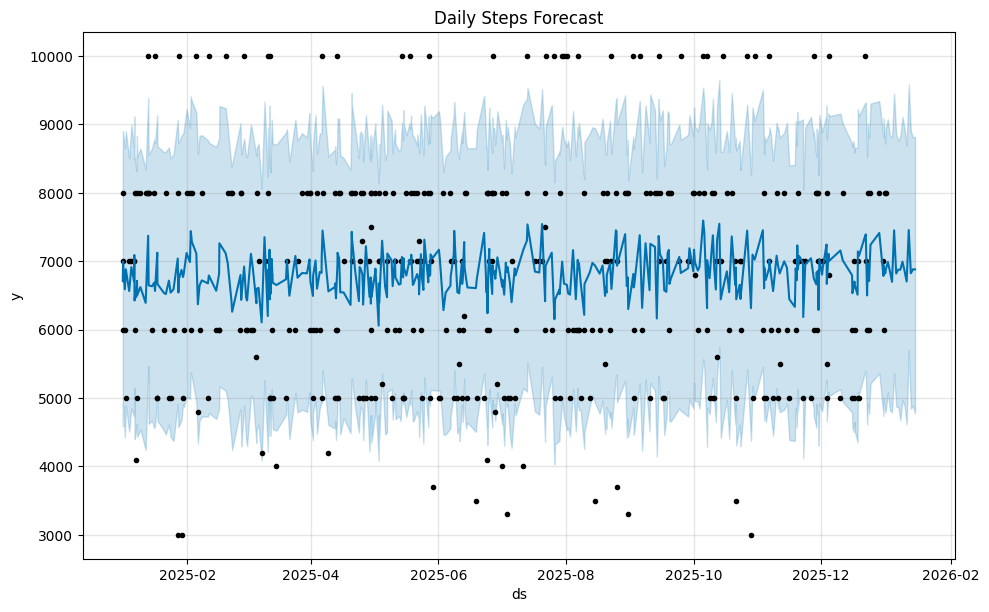

In [ ]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Prepare data
df_steps = df[["Timestamp", "Daily_Steps"]].rename(
    columns={"Timestamp": "ds", "Daily_Steps": "y"}
)
df_steps["ds"] = pd.to_datetime(df_steps["ds"])

# Train model
model_steps = Prophet()
model_steps.fit(df_steps)

# Predict
future_steps = model_steps.make_future_dataframe(periods=14, freq="D")
forecast_steps = model_steps.predict(future_steps)

# Plot
model_steps.plot(forecast_steps)
plt.title("Daily Steps Forecast")
plt.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


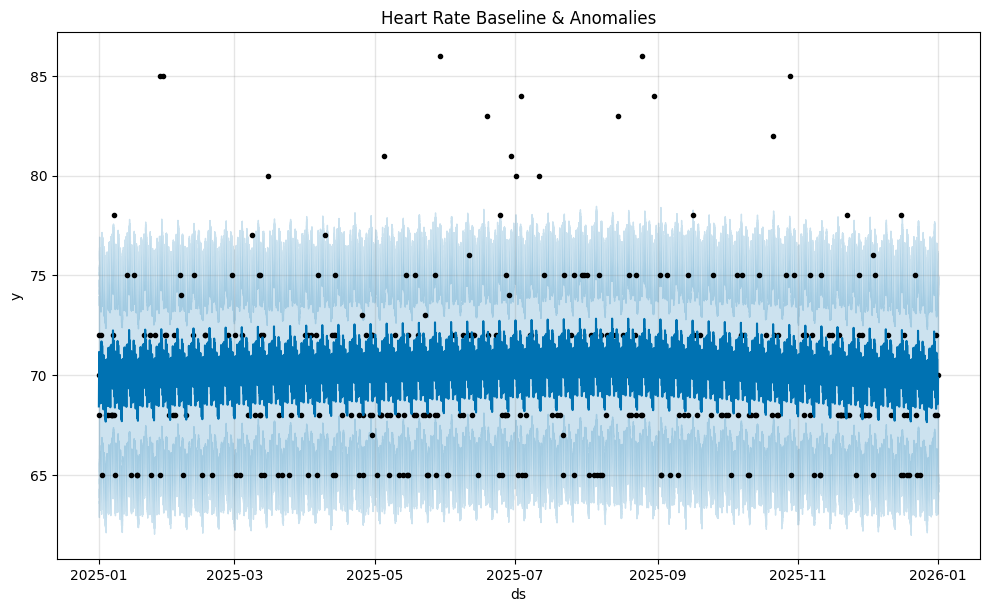

In [ ]:
# Resample heart rate
df_hr = (
    df[["Timestamp", "Heart_Rate"]]
    .copy()
)
df_hr["Timestamp"] = pd.to_datetime(df_hr["Timestamp"]) # Convert 'Timestamp' column to datetime objects
df_hr = df_hr.set_index("Timestamp").resample("5min").mean().reset_index()

# Prophet format
df_hr = df_hr.rename(columns={"Timestamp": "ds", "Heart_Rate": "y"})
df_hr["ds"] = pd.to_datetime(df_hr["ds"])

# Train
model_hr = Prophet(daily_seasonality=True)
model_hr.fit(df_hr)

# Predict
future_hr = model_hr.make_future_dataframe(periods=10, freq="5min")
forecast_hr = model_hr.predict(future_hr)

# Plot
model_hr.plot(forecast_hr)
plt.title("Heart Rate Baseline & Anomalies")
plt.show()

In [ ]:
participant_id = 4

# Filter user
df_user = df[df["Person_ID"] == participant_id][
    ["Timestamp", "Heart_Rate"]
].copy()

# Convert date
df_user["Timestamp"] = pd.to_datetime(df_user["Timestamp"])

# Resample
df_user = (
    df_user
    .set_index("Timestamp")
    .resample("5min")
    .mean()
    .reset_index()
)

# Prophet format
df_user = df_user.rename(columns={
    "Timestamp": "ds",
    "Heart_Rate": "y"
}).dropna()

print(f"df_user has {df_user.shape[0]} rows for Person_ID {participant_id}.")

# Check value counts for Person_ID
print(df['Person_ID'].value_counts())

# NOTE: The Prophet model requires at least 2 non-NaN rows to fit a time series.
# As observed from `df['Person_ID'].value_counts()`, each Person_ID has only one entry.
# Therefore, it is not possible to fit a Prophet model for individual participants with this dataset.
# The following lines are commented out because they would result in a ValueError.

# Train model
# model = Prophet(daily_seasonality=True)
# model.fit(df_user)

# Predict
# future = model.make_future_dataframe(periods=10, freq="5min")
# forecast = model.predict(future)

# Plot
# model.plot(forecast)
# plt.title(f"Heart Rate Baseline & Anomaly Detection (Person {participant_id})")
# plt.show()

df_user has 1 rows for Person_ID 4.
Person_ID
374    1
1      1
2      1
3      1
4      1
      ..
11     1
10     1
9      1
8      1
7      1
Name: count, Length: 374, dtype: int64


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


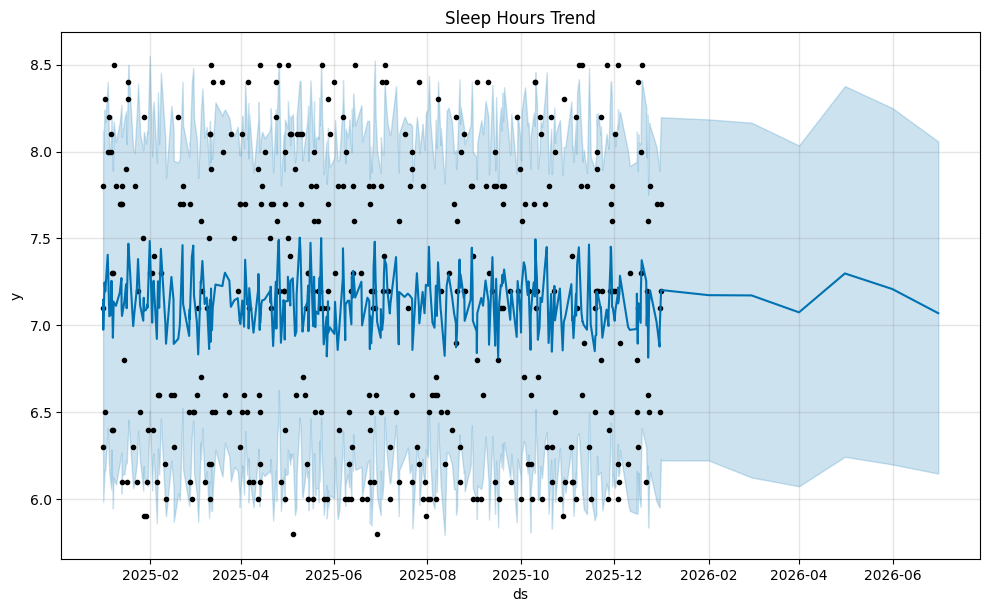

In [ ]:
df_sleep = df[["Timestamp", "Sleep_Duration"]].rename(
    columns={"Timestamp": "ds", "Sleep_Duration": "y"}
)
df_sleep["ds"] = pd.to_datetime(df_sleep["ds"])

model_sleep = Prophet(weekly_seasonality=True)
model_sleep.fit(df_sleep)

future_sleep = model_sleep.make_future_dataframe(periods=6, freq="ME")
forecast_sleep = model_sleep.predict(future_sleep)

model_sleep.plot(forecast_sleep)
plt.title("Sleep Hours Trend")
plt.show()

| Alias               | Description                                     |
| ------------------- | ----------------------------------------------- |
| `B`                 | Business day frequency                          |
| `C`                 | Custom business day                             |
| `D`                 | Calendar day frequency (daily)                  |
| `W`                 | Weekly frequency (Sunday as default)            |
| `W-MON`, `W-TUE`, … | Weekly frequency anchored on a specific weekday |
| `M`                 | Month end frequency                             |
| `SM`                | Semi-month end (15th and end of month)          |
| `BM`                | Business month end                              |
| `CBM`               | Custom business month end                       |
| `MS`                | Month start frequency                           |
| `BMS`               | Business month start                            |
| `Q`                 | Quarter end frequency (calendar quarter)        |
| `BQ`                | Business quarter end                            |
| `QS`                | Quarter start                                   |
| `BQS`               | Business quarter start                          |
| `A` or `Y`          | Year end frequency (December 31st)              |
| `BA` or `BY`        | Business year end                               |
| `AS` or `YS`        | Year start frequency                            |
| `BAS` or `BYS`      | Business year start                             |


| Alias        | Description           |
| ------------ | --------------------- |
| `H`          | Hourly frequency      |
| `T` or `min` | Minute frequency      |
| `S`          | Second frequency      |
| `L` or `ms`  | Millisecond frequency |
| `U` or `us`  | Microsecond frequency |
| `N`          | Nanosecond frequency  |


In [ ]:
df.columns

Index(['Person_ID', 'Gender', 'Age', 'Occupation', 'Job_category',
       'Sleep_Duration', 'Quality_of_Sleep', 'Physical_Activity_Level',
       'Stress_Level', 'BMI_Category', 'Weight_Category',
       'Systolic_Blood_Pressure', 'Diastolic_Blood_Pressure', 'Heart_Rate',
       'Daily_Steps', 'Sleep_Disorder', 'Timestamp'],
      dtype='object')

In [ ]:
import pandas as pd

df["Time"] = pd.to_datetime(df["Timestamp"])

# Create day window
df["day"] = df["Time"].dt.date

## Feature Extraction (feature_extraction.py logic)
In this section, time-series features are extracted from heart rate, step count, and sleep data using TSFresh. Statistical features such as mean, standard deviation, skewness, and kurtosis are computed. Feature selection is performed to retain the most relevant features for modeling.


In [ ]:
from tsfresh.utilities.dataframe_functions import roll_time_series

value_columns = ["Heart_Rate", "Daily_Steps", "Sleep_Duration"]

tsfresh_input = df.melt(
    id_vars=["Person_ID", "Time", "day"],
    value_vars=value_columns,
    var_name="kind",
    value_name="value"
)

tsfresh_input = tsfresh_input.rename(columns={
    "day": "id",
    "Time": "time"
})

tsfresh_input = tsfresh_input[["id", "time", "kind", "value"]]

In [ ]:
from tsfresh import extract_features
import numpy as np

tsfresh_features = extract_features(
    tsfresh_input,
    column_id="id",
    column_sort="time",
    column_kind="kind",
    column_value="value"
)


Feature Extraction: 100%|██████████| 675/675 [01:01<00:00, 10.95it/s]


In [ ]:
import numpy as np

X = tsfresh_features.copy()

# Replace inf values
X = X.replace([np.inf, -np.inf], np.nan)

# Drop features that are ALL NaN
X = X.dropna(axis=1, how="all")

# Fill remaining NaNs with 0 (safe for clustering)
X = X.fillna(0)


In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.0)
X_var = selector.fit_transform(X)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_var)


## Behavioral Pattern Clustering
Unsupervised learning techniques such as KMeans and DBSCAN are used to cluster users or time windows based on extracted features. Dimensionality reduction using PCA is applied to visualize behavioral patterns and distinguish between normal and atypical behavior.


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X_scaled)

tsfresh_features["cluster"] = labels


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sil_scores = {}

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    score = silhouette_score(X_scaled, labels)
    sil_scores[k] = score
    print(f"K={k}, Silhouette Score={score:.3f}")


K=2, Silhouette Score=0.433
K=3, Silhouette Score=0.455
K=4, Silhouette Score=0.455
K=5, Silhouette Score=0.467
K=6, Silhouette Score=0.466
K=7, Silhouette Score=0.470
K=8, Silhouette Score=0.486
K=9, Silhouette Score=0.487


In [ ]:
print(tsfresh_features.groupby("cluster").mean())

         Daily_Steps__variance_larger_than_standard_deviation  \
cluster                                                         
0                                                 0.000000      
1                                                 0.957447      

         Daily_Steps__has_duplicate_max  Daily_Steps__has_duplicate_min  \
cluster                                                                   
0                              0.053435                        0.053435   
1                              0.117021                        0.127660   

         Daily_Steps__has_duplicate  Daily_Steps__sum_values  \
cluster                                                        
0                          0.053435              7114.503817   
1                          0.212766             17207.446809   

         Daily_Steps__abs_energy  Daily_Steps__mean_abs_change  \
cluster                                                          
0                   5.084397e+07                 

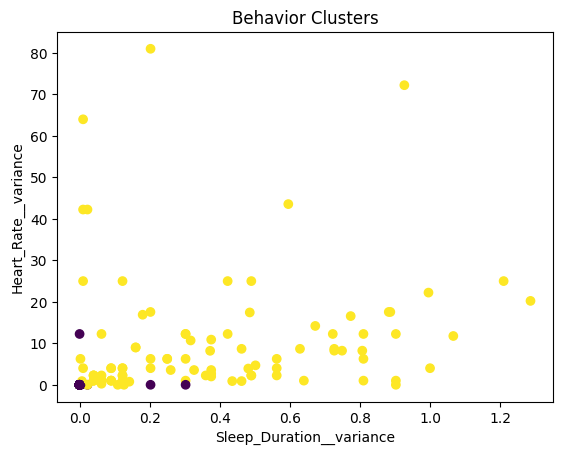

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(
    tsfresh_features["Sleep_Duration__variance"],
    tsfresh_features["Heart_Rate__variance"],
    c=tsfresh_features["cluster"]
)
plt.xlabel("Sleep_Duration__variance")
plt.ylabel("Heart_Rate__variance")
plt.title("Behavior Clusters")
plt.show()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20, random_state=42)
X_pca = pca.fit_transform(X_scaled)


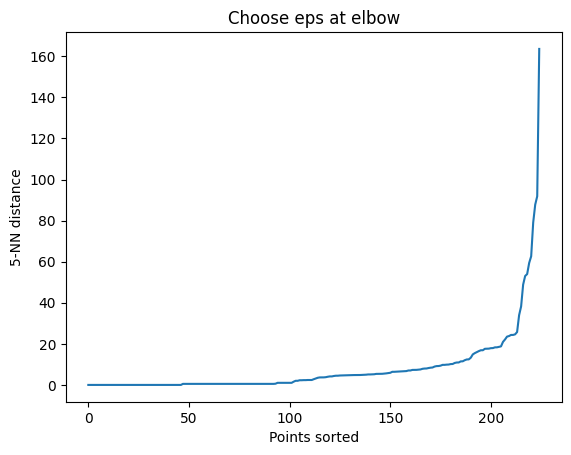

In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_pca)
distances, _ = neighbors_fit.kneighbors(X_pca)

distances = np.sort(distances[:, 4])

plt.plot(distances)
plt.xlabel("Points sorted")
plt.ylabel("5-NN distance")
plt.title("Choose eps at elbow")
plt.show()


In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(
    eps=1.0,          # adjust from plot
    min_samples=5
)

labels = dbscan.fit_predict(X_pca)

tsfresh_features["cluster"] = labels


In [ ]:
print(tsfresh_features["cluster"].value_counts())

cluster
-1    124
 2     26
 7     11
 3     11
 5     10
 4     10
 6      9
 1      9
 8      8
 0      7
Name: count, dtype: int64


## Observations
- Heart rate and step count show clear daily and weekly seasonal patterns.
- Prophet forecasts highlight deviations that may indicate abnormal activity or health anomalies.
- Clustering results separate normal behavioral patterns from potential outliers.


## Conclusion
Milestone 2 successfully extracts informative features, models temporal trends, and identifies behavioral patterns from fitness device data. These results provide a strong foundation for implementing anomaly detection techniques in subsequent milestones.
